## I) Importation des données

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Classe de gestion du dataset
class data_set:
    
    # chargement des données via le constructeur
    def __init__(self, name_to_print, *names_of_file):
        self.wine_name = name_to_print
        if(len(names_of_file)==2):
            df1 = pd.read_csv(names_of_file[0],
                            sep=";",
                            header=0)
            df2 = pd.read_csv(names_of_file[1],
                            sep=";",
                            header=0)
            self.wine_data = pd.concat([df1, df2])  
        else:
            self.wine_data = pd.read_csv(names_of_file[0],
                          sep=";",
                          header=0)
        
        self.NB_RECORDS_WINE_DATA_INITIAL = self.wine_data.shape[0]
        self.COLUMNS_NAMES = self.wine_data.columns
        # Nb of categories in quality label
        self.k = 0
        
    # Affichage du Shape du dataset
    def print_shape(self):
        print(self.wine_name, self.wine_data.shape)

    # Affichage des 1ères lignes du dataset
    def print_head(self):
        print(self.wine_name)
        return self.wine_data.head()
        
    # Affichage des noms de colonnes du dataset
    def print_columns_names(self):
        print(self.wine_name)
        return self.COLUMNS_NAMES
    
    # Description statistique des features du dataset
    def print_describe_stats_of_data(self):
        print(self.wine_name)
        return self.wine_data.describe()

    # Indique s'il y a des valeurs manquantes
    def print_is_missing_values_by_columns(self):
        print(self.wine_name, "nb de vals manquantes par colonne :\n", wine_data.isna().sum())        
        
    # Compte les occurrences par catégorie de la valeur cible
    def print_count_occurences_by_target_variable(self):
        print(self.wine_name + "\n", self.wine_data["quality"].value_counts())
    
    # Split du dataset en X_data et y_data
    def split_data_to_X_and_y(self):
        self.X_data = self.wine_data.as_matrix(self.wine_data.columns[:-1])
        self.y_data = self.wine_data.as_matrix([self.wine_data.columns[-1]])
        self.y_data = self.y_data.flatten()
        
        print("=============== New shape of "+self.wine_name+ " Data after split=============")
        # Split du dataset en X_data (features prédictives) et y_data (variable cible à prédire)
        print(self.X_data.shape)
        print(self.y_data.shape)        

    # Affiche l'histogramme des features
    def show_histogram_of_features(self):
        # On créé un histogramme pour chacun des features pour voir leur distribution
        fig = plt.figure(figsize=(16, 12))
        for feature_index in range(self.X_data.shape[1]):
            # 12 figures d'histogrammes en 3 rows et 4 colonnes 
            ax = fig.add_subplot(3,4, (feature_index+1))
            # Histogramme bleu de 50 bins
            h = ax.hist(self.X_data[:, feature_index], bins=50, color='steelblue',
                    normed=True, edgecolor='none')
            # On met un titre à chaque histogram
            ax.set_title(self.COLUMNS_NAMES[feature_index], fontsize=14)
    
    # Affiche l'histogramme montrant la répartition des catégories de la target variable
    def show_target_variable_histogram(self):
        abscisse = range(np.min(self.y_data), np.max(self.y_data)+1)
        abscisse_categ_list = [(self.y_data == a).sum() for a in abscisse]
        b = plt.bar(abscisse, abscisse_categ_list, color="steelblue")
        title_to_show = "Repartition des labels \"Quality\" " + "for "+self.wine_name
        plt.title(title_to_show, fontsize=14)
        plt.show()

        unique_label, counts_elements = np.unique(self.y_data, return_counts=True)
        # Dictionnaire de "label : count_of_occurrence"
        print("Repartition des : (label, count_of_occurence) ", dict(zip(unique_label, counts_elements)))        
    
    # Split de manière équilibrée le dataset en k catégories 
    def convert_ylabel_into_k_categories_equilibre(self, k_categ = 3):
        if(k_categ == 2):
            np.place(self.wine_data["quality"].values, self.wine_data["quality"].values < 6, 0)
            np.place(self.wine_data["quality"].values, self.wine_data["quality"].values >= 6, 1)
            
        else:
            np.place(self.wine_data["quality"].values, self.wine_data["quality"].values < 6, 0)
            np.place(self.wine_data["quality"].values, self.wine_data["quality"].values == 6, 1)
            np.place(self.wine_data["quality"].values, self.wine_data["quality"].values > 6, 2)

        unique_label, counts_elements = np.unique(self.wine_data["quality"].values, return_counts=True)
        my_dict = dict(zip(unique_label, counts_elements))
        print(my_dict)
        label_of_minor_class = min(my_dict.keys(), key=(lambda k: my_dict[k]))
        size_of_minor_class =  my_dict[label_of_minor_class]

        print("label_of_minor_class :", label_of_minor_class, "size_of_minor_class", size_of_minor_class)

        df_minority = self.wine_data[self.wine_data["quality"].values==label_of_minor_class]
        
        if(k_categ == 2):
            df_non_minority_1 = self.wine_data[self.wine_data["quality"].values!=label_of_minor_class]
            
            # Downsample majority class
            df_non_minority_1_downsampled = resample(df_non_minority_1, 
                                             replace=False,    # sample without replacement
                                             n_samples=size_of_minor_class,     # to match minority class
                                             random_state=123) # reproducible results

            # Combine minority class with downsampled majority class
            df_downsampled = pd.concat([df_non_minority_1_downsampled, df_minority])
            
        else:
            df_non_minority_1 = self.wine_data[self.wine_data["quality"].values==0]
            df_non_minority_2 =  self.wine_data[self.wine_data["quality"].values==1]
            
            # Downsample majority class
            df_non_minority_1_downsampled = resample(df_non_minority_1, 
                                             replace=False,    # sample without replacement
                                             n_samples=size_of_minor_class,     # to match minority class
                                             random_state=123) # reproducible results

            # Downsample majority class
            df_non_minority_2_downsampled = resample(df_non_minority_2, 
                                             replace=False,    # sample without replacement
                                             n_samples=size_of_minor_class,     # to match minority class
                                             random_state=123) # reproducible results

            # Combine minority class with downsampled majority class
            df_downsampled = pd.concat([df_non_minority_1_downsampled, df_non_minority_2_downsampled, df_minority])
            
        # new target values data after downsampling
        self.wine_data = df_downsampled
        self.split_data_to_X_and_y()
        
    # Split de manière déséquilibrée le dataset en k catégories
    def convert_ylabel_into_k_categories_desequilibre(self, k_categ=3):
        self.k = k_categ
        if(self.k == 2):
            np.place(self.y_data, self.y_data < 6, 0)
            np.place(self.y_data, self.y_data >= 6, 1)

        if(self.k == 3):
            np.place(self.y_data, self.y_data < 6, 0)
            np.place(self.y_data, self.y_data == 6, 1)
            np.place(self.y_data, self.y_data > 6, 2)
            
    # Affiche la répartition de la qualité après le split en k catégories            
    def show_ylabel_repartition_info(self):
        self.show_target_variable_histogram()
      
        if(self.k == 2):
            category_of_quality = ["Low quality", "High quality"]
        if(self.k == 3):
            category_of_quality = ["Low quality", "Medium quality", "High quality"]

        print("======= If Quality of {} Wine was splited into {} categories =======".format(self.wine_name, self.k))    
        if(self.k > 0):
            for idx, category in enumerate(category_of_quality):
                count_of_quality_categ_in_wine = len(np.where(self.y_data == idx)[0])
                count = count_of_quality_categ_in_wine/len(self.y_data)
                print("{} : {} rows ({:.2f}%)".format(category, count_of_quality_categ_in_wine, count*100) )              
        
    # Split du dataset en X_train, X_test, y_train, y_test
    def split_into_train_test(self, size_of_test_set=0.2):
        # split test et training set
        from sklearn.model_selection import train_test_split        
        self.X_train, self.X_test, self.y_train, self.y_test  = train_test_split(self.X_data, self.y_data, test_size = size_of_test_set, random_state = 42)        
      
        print("=============== New shape of "+self.wine_name+ " Data after X_{train, test} and y_{train, test} split=============")
        print("X_"+self.wine_name+"_train ", self.X_train.shape)
        print("X_"+self.wine_name+"_test ", self.X_test.shape)      
        print("y_"+self.wine_name+"_train ", self.y_train.shape)
        print("y_"+self.wine_name+"_test ", self.y_test.shape)
    
    # Preprocessing des features de X_train et X_test
    def preprocessing_feature_scaling_for_Xtrain_Xtest(self):
        scaler_wine = StandardScaler()
        self.X_train = scaler_wine.fit_transform(self.X_train)
        self.X_test = scaler_wine.transform(self.X_test)    

                    

In [0]:
print("=================== Dimensions des dataset White et Red simples en 10 classes ==============")
wine_white_data = data_set("White", "winequality-white.csv")
wine_red_data = data_set("Red", "winequality-red.csv")
wine_combine_data = data_set("White-Red", "winequality-white.csv", "winequality-red.csv")

wine_white_data.print_shape()
wine_red_data.print_shape()
wine_combine_data.print_shape()

=================== Dimensions des dataset White et Red simples en 10 classes ==============
White (4898, 12)
Red (1599, 12)
White-Red (6497, 12)


In [0]:
print("=================== Dimensions des dataset White, Red et combine pour les cas equilibres ===============")
wine_white_data_2_kind_of_quality_equilibrees = data_set("White_2_Quality_equilibre", "winequality-white.csv")
wine_white_data_3_kind_of_quality_equilibrees = data_set("White_3_Quality_equilibre", "winequality-white.csv")

wine_red_data_2_kind_of_quality_equilibrees = data_set("Red_2_Quality_equilibre", "winequality-red.csv")
wine_red_data_3_kind_of_quality_equilibrees = data_set("Red_3_Quality_equilibre", "winequality-red.csv")

wine_combine_data_2_kind_of_quality_equilibrees = data_set("White-Red_2_Quality_equilibre", "winequality-white.csv", "winequality-red.csv")
wine_combine_data_3_kind_of_quality_equilibrees = data_set("White-Red_3_Quality_equilibre", "winequality-white.csv", "winequality-red.csv")


wine_white_data_2_kind_of_quality_equilibrees.print_shape()
wine_white_data_3_kind_of_quality_equilibrees.print_shape()

wine_red_data_2_kind_of_quality_equilibrees.print_shape()
wine_red_data_3_kind_of_quality_equilibrees.print_shape()

wine_combine_data_2_kind_of_quality_equilibrees.print_shape()
wine_combine_data_3_kind_of_quality_equilibrees.print_shape()


=================== Dimensions des dataset White, Red et combine pour les cas equilibres ===============
White_2_Quality_equilibre (4898, 12)
White_3_Quality_equilibre (4898, 12)
Red_2_Quality_equilibre (1599, 12)
Red_3_Quality_equilibre (1599, 12)
White-Red_2_Quality_equilibre (6497, 12)
White-Red_3_Quality_equilibre (6497, 12)


In [0]:
print("================================== Dimensions des dataset White, Red et combine pour les cas desequilibres =====================")
wine_white_data_3_kind_of_quality_desequilibrees = data_set("White_3_Quality_desequilibre", "winequality-white.csv")
wine_red_data_3_kind_of_quality_desequilibrees = data_set("Red_3_Quality_desequilibre", "winequality-red.csv")
wine_combine_data_3_kind_of_quality_desequilibrees = data_set("White-Red_3_Quality_desequilibre", "winequality-white.csv", "winequality-red.csv")

wine_white_data_3_kind_of_quality_desequilibrees.print_shape()
wine_red_data_3_kind_of_quality_desequilibrees.print_shape()
wine_combine_data_3_kind_of_quality_desequilibrees.print_shape()

================================== Dimensions des dataset White, Red et combine pour les cas desequilibres =====================
White_3_Quality_desequilibre (4898, 12)
Red_3_Quality_desequilibre (1599, 12)
White-Red_3_Quality_desequilibre (6497, 12)


## II) Analyse exploratoire de données

In [0]:
wine_white_data.print_columns_names()

White


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
wine_red_data.print_columns_names()

Red


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
wine_white_data.print_head()

White


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
wine_red_data.print_head()

Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
wine_combine_data.print_head()

White-Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
wine_white_data.print_describe_stats_of_data()

White


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [0]:
wine_red_data.print_describe_stats_of_data()

Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
wine_combine_data.print_describe_stats_of_data()

White-Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [0]:
wine_white_data.print_count_occurences_by_target_variable()

White
 6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [0]:
wine_red_data.print_count_occurences_by_target_variable()

Red
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [0]:
wine_combine_data.print_count_occurences_by_target_variable()

White-Red
 6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


### II.a) Y-a-t-il des valeurs manquantes ?

In [0]:
wine_white_data_2_kind_of_quality_equilibrees.convert_ylabel_into_k_categories_equilibre(2)
wine_white_data_3_kind_of_quality_equilibrees.convert_ylabel_into_k_categories_equilibre(3)

{0: 1640, 1: 3258}
label_of_minor_class : 0 size_of_minor_class 1640
=============== New shape of White_2_Quality_equilibre Data after split=============
(3280, 11)
(3280,)
{0: 1640, 1: 2198, 2: 1060}
label_of_minor_class : 2 size_of_minor_class 1060
=============== New shape of White_3_Quality_equilibre Data after split=============
(3180, 11)
(3180,)


In [0]:
wine_red_data_2_kind_of_quality_equilibrees.convert_ylabel_into_k_categories_equilibre(2)
wine_red_data_3_kind_of_quality_equilibrees.convert_ylabel_into_k_categories_equilibre(3)

{0: 744, 1: 855}
label_of_minor_class : 0 size_of_minor_class 744
=============== New shape of Red_2_Quality_equilibre Data after split=============
(1488, 11)
(1488,)
{0: 744, 1: 638, 2: 217}
label_of_minor_class : 2 size_of_minor_class 217
=============== New shape of Red_3_Quality_equilibre Data after split=============
(651, 11)
(651,)


In [0]:
wine_combine_data_2_kind_of_quality_equilibrees.convert_ylabel_into_k_categories_equilibre(2)
wine_combine_data_3_kind_of_quality_equilibrees.convert_ylabel_into_k_categories_equilibre(3)

{0: 2384, 1: 4113}
label_of_minor_class : 0 size_of_minor_class 2384
=============== New shape of White-Red_2_Quality_equilibre Data after split=============
(4768, 11)
(4768,)
{0: 2384, 1: 2836, 2: 1277}
label_of_minor_class : 2 size_of_minor_class 1277
=============== New shape of White-Red_3_Quality_equilibre Data after split=============
(3831, 11)
(3831,)


### II.b) Split du dataset en X_data (features prédictives) et y_data (variable cible à prédire)

In [0]:
wine_white_data.split_data_to_X_and_y()

=============== New shape of White Data after split=============
(4898, 11)
(4898,)


In [0]:
wine_red_data.split_data_to_X_and_y()

=============== New shape of Red Data after split=============
(1599, 11)
(1599,)


In [0]:
wine_combine_data.split_data_to_X_and_y()

=============== New shape of White-Red Data after split=============
(6497, 11)
(6497,)


In [0]:
wine_white_data_3_kind_of_quality_desequilibrees.split_data_to_X_and_y()

=============== New shape of White_3_Quality_desequilibre Data after split=============
(4898, 11)
(4898,)


In [0]:
wine_red_data_3_kind_of_quality_desequilibrees.split_data_to_X_and_y()

=============== New shape of Red_3_Quality_desequilibre Data after split=============
(1599, 11)
(1599,)


In [0]:
wine_combine_data_3_kind_of_quality_desequilibrees.split_data_to_X_and_y()

=============== New shape of White-Red_3_Quality_desequilibre Data after split=============
(6497, 11)
(6497,)


## III) Visualisation graphique des données

- On remarque en particulier que ces variables prennent des valeurs dans des ensembles différents. Par exemple, “sulphates” varie de 0 à 1 tandis que “total sulfur dioxide” varie de 0 à 440. Il va donc nous falloir standardiser les données pour que la deuxième ne domine pas complètement la première.



### Plot des histogrammes de features pour le White Wine Dataset

In [0]:
#wine_white_data.show_histogram_of_features()
#wine_white_data_3_kind_of_quality_desequilibrees.show_histogram_of_features()

### Plot des histogrammes de features pour le Red Wine Dataset

In [0]:
#wine_red_data.show_histogram_of_features()
#wine_white_data_3_kind_of_quality_equilibrees.show_histogram_of_features()

### Plot des histogrammes de features pour le White & Red Wine combines Dataset

In [0]:
#wine_combine_data.show_histogram_of_features()

### **Il serait peut être intéressant d'étudier (les performances de deux manières) :**  
- 1) La possibilité de découper nos labels de prédiction en : {3, 4, 5} = **low quality**;  { 6 } = **medium quality**;  et {7, 8, 9} = **high quality**;
- 2) La possibilité de découper nos labels de prédiction en : {3, 4, 5} = **low quality**;  { 6, 7, 8, 9} = **high quality**;
- 3) Ou en laissant le label de qualité comme il était : {3, 4, 5, 6, 7, 8, 9}

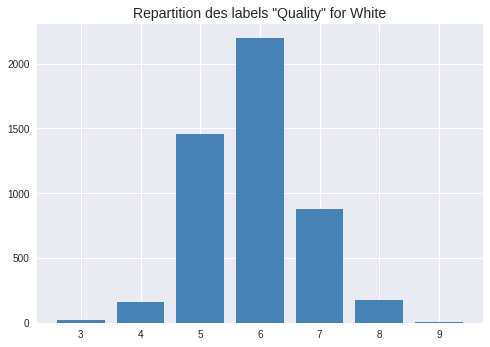

Repartition des : (label, count_of_occurence)  {3: 20, 4: 163, 5: 1457, 6: 2198, 7: 880, 8: 175, 9: 5}


In [0]:
wine_white_data.show_target_variable_histogram()

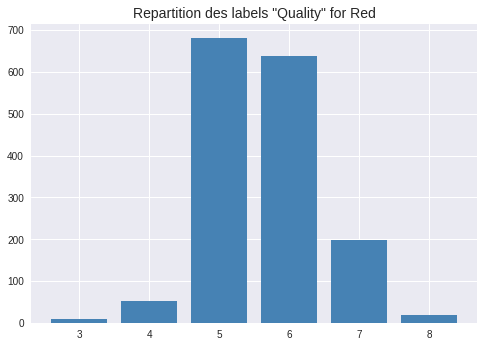

Repartition des : (label, count_of_occurence)  {3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}


In [0]:
wine_red_data.show_target_variable_histogram()

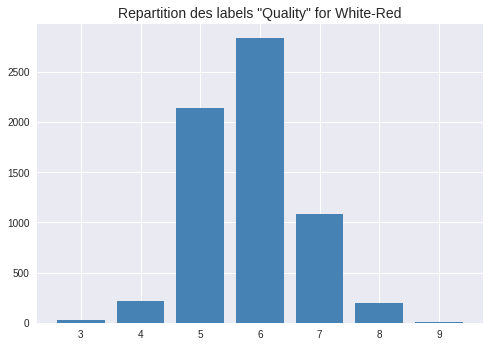

Repartition des : (label, count_of_occurence)  {3: 30, 4: 216, 5: 2138, 6: 2836, 7: 1079, 8: 193, 9: 5}


In [0]:
wine_combine_data.show_target_variable_histogram()

## IV) Split du dataset en X_train, X_test, Y_train, Y_test


### IV.A) Repartition des datasets en labels EQUILIBRES pour "White", "Red" et la combinaison de "White-Red" wine.


In [0]:
wine_combine_data_3_kind_of_quality_desequilibrees.convert_ylabel_into_k_categories_desequilibre(3)

wine_white_data_3_kind_of_quality_desequilibrees.convert_ylabel_into_k_categories_desequilibre(3)

wine_red_data_3_kind_of_quality_desequilibrees.convert_ylabel_into_k_categories_desequilibre(3)

In [0]:
#wine_combine_data_2_kind_of_quality_equilibrees.show_ylabel_repartition_info()
#wine_white_data_2_kind_of_quality_equilibrees.show_ylabel_repartition_info()
#wine_red_data_2_kind_of_quality_equilibrees.show_ylabel_repartition_info()

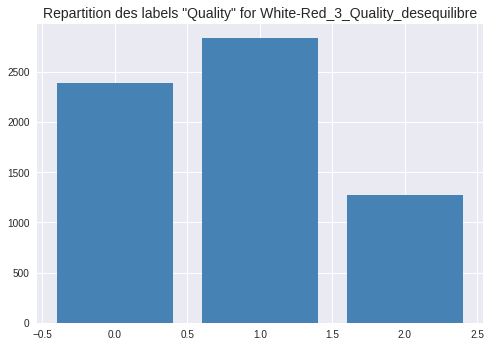

Repartition des : (label, count_of_occurence)  {0: 2384, 1: 2836, 2: 1277}
======= If Quality of White-Red_3_Quality_desequilibre Wine was splited into 3 categories =======
Low quality : 2384 rows (36.69%)
Medium quality : 2836 rows (43.65%)
High quality : 1277 rows (19.66%)


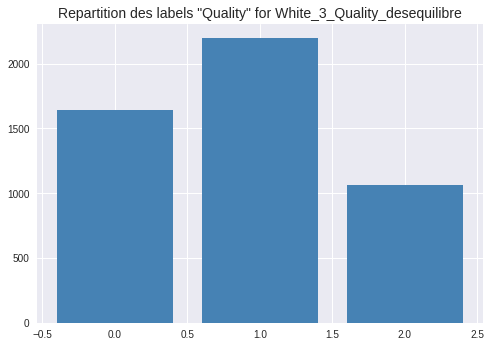

Repartition des : (label, count_of_occurence)  {0: 1640, 1: 2198, 2: 1060}
======= If Quality of White_3_Quality_desequilibre Wine was splited into 3 categories =======
Low quality : 1640 rows (33.48%)
Medium quality : 2198 rows (44.88%)
High quality : 1060 rows (21.64%)


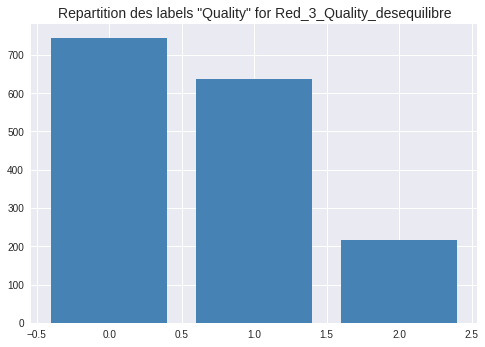

Repartition des : (label, count_of_occurence)  {0: 744, 1: 638, 2: 217}
======= If Quality of Red_3_Quality_desequilibre Wine was splited into 3 categories =======
Low quality : 744 rows (46.53%)
Medium quality : 638 rows (39.90%)
High quality : 217 rows (13.57%)


In [0]:
#wine_combine_data_3_kind_of_quality_equilibrees.show_ylabel_repartition_info()
#wine_white_data_3_kind_of_quality_equilibrees.show_ylabel_repartition_info()
#wine_red_data_3_kind_of_quality_equilibrees.show_ylabel_repartition_info()

wine_combine_data_3_kind_of_quality_desequilibrees.show_ylabel_repartition_info()
wine_white_data_3_kind_of_quality_desequilibrees.show_ylabel_repartition_info()
wine_red_data_3_kind_of_quality_desequilibrees.show_ylabel_repartition_info()

### IV.B) Split du dataset en X_train, X_test, Y_train, Y_test


In [0]:
wine_combine_data.split_into_train_test(0.2)
wine_combine_data_2_kind_of_quality_equilibrees.split_into_train_test(0.2)
wine_combine_data_3_kind_of_quality_equilibrees.split_into_train_test(0.2)

=============== New shape of White-Red Data after X_{train, test} and y_{train, test} split=============
X_White-Red_train  (5197, 11)
X_White-Red_test  (1300, 11)
y_White-Red_train  (5197,)
y_White-Red_test  (1300,)
=============== New shape of White-Red_2_Quality_equilibre Data after X_{train, test} and y_{train, test} split=============
X_White-Red_2_Quality_equilibre_train  (3814, 11)
X_White-Red_2_Quality_equilibre_test  (954, 11)
y_White-Red_2_Quality_equilibre_train  (3814,)
y_White-Red_2_Quality_equilibre_test  (954,)
=============== New shape of White-Red_3_Quality_equilibre Data after X_{train, test} and y_{train, test} split=============
X_White-Red_3_Quality_equilibre_train  (3064, 11)
X_White-Red_3_Quality_equilibre_test  (767, 11)
y_White-Red_3_Quality_equilibre_train  (3064,)
y_White-Red_3_Quality_equilibre_test  (767,)


In [0]:
wine_white_data.split_into_train_test(0.2)
wine_white_data_2_kind_of_quality_equilibrees.split_into_train_test(0.2)
wine_white_data_3_kind_of_quality_equilibrees.split_into_train_test(0.2)

=============== New shape of White Data after X_{train, test} and y_{train, test} split=============
X_White_train  (3918, 11)
X_White_test  (980, 11)
y_White_train  (3918,)
y_White_test  (980,)
=============== New shape of White_2_Quality_equilibre Data after X_{train, test} and y_{train, test} split=============
X_White_2_Quality_equilibre_train  (2624, 11)
X_White_2_Quality_equilibre_test  (656, 11)
y_White_2_Quality_equilibre_train  (2624,)
y_White_2_Quality_equilibre_test  (656,)
=============== New shape of White_3_Quality_equilibre Data after X_{train, test} and y_{train, test} split=============
X_White_3_Quality_equilibre_train  (2544, 11)
X_White_3_Quality_equilibre_test  (636, 11)
y_White_3_Quality_equilibre_train  (2544,)
y_White_3_Quality_equilibre_test  (636,)


In [0]:
wine_red_data.split_into_train_test(0.2)
wine_red_data_2_kind_of_quality_equilibrees.split_into_train_test(0.2)
wine_red_data_3_kind_of_quality_equilibrees.split_into_train_test(0.2)

=============== New shape of Red Data after X_{train, test} and y_{train, test} split=============
X_Red_train  (1279, 11)
X_Red_test  (320, 11)
y_Red_train  (1279,)
y_Red_test  (320,)
=============== New shape of Red_2_Quality_equilibre Data after X_{train, test} and y_{train, test} split=============
X_Red_2_Quality_equilibre_train  (1190, 11)
X_Red_2_Quality_equilibre_test  (298, 11)
y_Red_2_Quality_equilibre_train  (1190,)
y_Red_2_Quality_equilibre_test  (298,)
=============== New shape of Red_3_Quality_equilibre Data after X_{train, test} and y_{train, test} split=============
X_Red_3_Quality_equilibre_train  (520, 11)
X_Red_3_Quality_equilibre_test  (131, 11)
y_Red_3_Quality_equilibre_train  (520,)
y_Red_3_Quality_equilibre_test  (131,)


In [0]:
# Rajouter le 28/11
wine_combine_data_3_kind_of_quality_desequilibrees.split_into_train_test(0.2)
wine_white_data_3_kind_of_quality_desequilibrees.split_into_train_test(0.2)
wine_red_data_3_kind_of_quality_desequilibrees.split_into_train_test(0.2)

=============== New shape of White-Red_3_Quality_desequilibre Data after X_{train, test} and y_{train, test} split=============
X_White-Red_3_Quality_desequilibre_train  (5197, 11)
X_White-Red_3_Quality_desequilibre_test  (1300, 11)
y_White-Red_3_Quality_desequilibre_train  (5197,)
y_White-Red_3_Quality_desequilibre_test  (1300,)
=============== New shape of White_3_Quality_desequilibre Data after X_{train, test} and y_{train, test} split=============
X_White_3_Quality_desequilibre_train  (3918, 11)
X_White_3_Quality_desequilibre_test  (980, 11)
y_White_3_Quality_desequilibre_train  (3918,)
y_White_3_Quality_desequilibre_test  (980,)
=============== New shape of Red_3_Quality_desequilibre Data after X_{train, test} and y_{train, test} split=============
X_Red_3_Quality_desequilibre_train  (1279, 11)
X_Red_3_Quality_desequilibre_test  (320, 11)
y_Red_3_Quality_desequilibre_train  (1279,)
y_Red_3_Quality_desequilibre_test  (320,)



## V) Features scaling

- On normalise les features de manière à ce que certain attribut ne prenne pas le dessus sur d'autres attributs (notamment lors des caculs de distance)

In [0]:
wine_combine_data.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_combine_data_2_kind_of_quality_equilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_combine_data_3_kind_of_quality_equilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_combine_data_3_kind_of_quality_desequilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()

wine_white_data.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_white_data_2_kind_of_quality_equilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_white_data_3_kind_of_quality_equilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_white_data_3_kind_of_quality_desequilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()

wine_red_data.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_red_data_2_kind_of_quality_equilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_red_data_3_kind_of_quality_equilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()
wine_red_data_3_kind_of_quality_desequilibrees.preprocessing_feature_scaling_for_Xtrain_Xtest()


## VI) Prédiction de la qualité avec KNN

### Model class

In [0]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


class knn_model:
    
    def __init__(self, wine_data, nn = 5, w = 'uniform', p_value=2):
        self.wine_data = wine_data
        self.classifier = KNeighborsClassifier(n_neighbors = nn, weights = w, p = p_value, n_jobs=-1)
    
    def knn_train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)

    def knn_train(self):
        self.classifier.fit(self.wine_data.X_train, self.wine_data.y_train)
        
    def knn_predict(self, X_test):
        self.y_pred = self.classifier.predict(X_test)
        
    def knn_predict(self):
        self.y_pred = self.classifier.predict(self.wine_data.X_test)
        
    def knn_print_accuracy_score(self, y_test):
        print("\n============= Summary of perf on "+self.wine_data.wine_name+" ==================\n")
        print("Accuracy score : ", accuracy_score(y_test, self.y_pred))
        #cm = confusion_matrix(y_test, self.y_pred)
        #print(classification_report(y_test, self.y_pred))

    def knn_print_accuracy_score(self):
        print("\n============= Summary of perf on "+self.wine_data.wine_name+" ==================\n")
        print("Accuracy score : ", accuracy_score(self.wine_data.y_test, self.y_pred))
        print("list of unique_predicted_class ", np.unique( self.y_pred ) )
        self.plot_confusion_matrix()
        print(classification_report(self.wine_data.y_test, self.y_pred))        
      
    def search_by_gridSearch(self, neighbours, weights, p, cv=10): 
        hyerparams = {'n_neighbors': neighbours, 'weights': weights, 'p': p}
        self.grid_search = GridSearchCV(KNeighborsClassifier(),
                                      param_grid = hyerparams,
                                      scoring = 'accuracy',
                                      cv = cv,
                                      n_jobs = -1)
        self.grid_search.fit(self.wine_data.X_train, self.wine_data.y_train)
      
    def print_best_score_find_by_gridSearch(self):
        print("Meilleur résultat de la validation croisée :", self.grid_search.best_score_)
        print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:", self.grid_search.best_params_)
      
    def print_score_of_generalisation_on_test_set(self):
        # Après avoir trouvé la meilleure combinaison de paramètres, il est 
        # important de calculer l'erreur de généralisation sur le test_set
        y_pred = self.grid_search.predict(self.wine_data.X_test)
        print("\nResultat sur le jeu de test : %0.3f" % accuracy_score(self.wine_data.y_test, y_pred))
        
    def plot_confusion_matrix(self, normalize=False):
        cm = confusion_matrix(self.wine_data.y_test, self.y_pred)
        cmap=plt.cm.Blues
        
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title('Confusion Matrix for Test Data')
        plt.colorbar()
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()
        
    def compute_roc(self):
        from sklearn.metrics import roc_auc_score                
        print("roc :",roc_auc_score(self.wine_data.y_test, self.y_pred))

### Combined wine predictions


============= Summary of perf on White-Red ==================

Accuracy score :  0.5576923076923077
list of unique_predicted_class  [4 5 6 7 8]


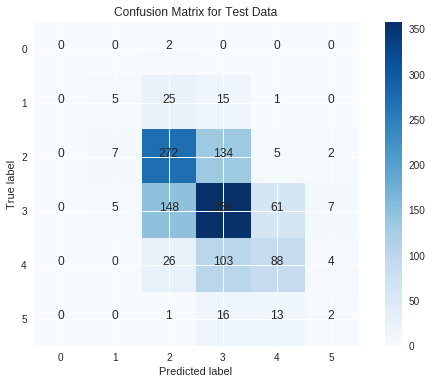

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.29      0.11      0.16        46
          5       0.57      0.65      0.61       420
          6       0.57      0.62      0.59       579
          7       0.52      0.40      0.45       221
          8       0.13      0.06      0.09        32

avg / total       0.54      0.56      0.55      1300


============= Summary of perf on White-Red_2_Quality_equilibre ==================

Accuracy score :  0.7389937106918238
list of unique_predicted_class  [0 1]


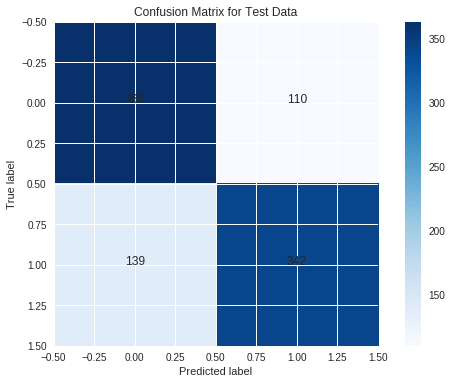

             precision    recall  f1-score   support

          0       0.72      0.77      0.74       473
          1       0.76      0.71      0.73       481

avg / total       0.74      0.74      0.74       954

roc : 0.7392302857419137

============= Summary of perf on White-Red_3_Quality_equilibre ==================

Accuracy score :  0.5919165580182529
list of unique_predicted_class  [0 1 2]


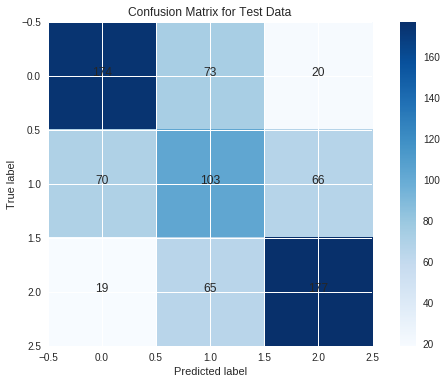

             precision    recall  f1-score   support

          0       0.66      0.65      0.66       267
          1       0.43      0.43      0.43       239
          2       0.67      0.68      0.68       261

avg / total       0.59      0.59      0.59       767


============= Summary of perf on White-Red_3_Quality_desequilibre ==================

Accuracy score :  0.61
list of unique_predicted_class  [0 1 2]


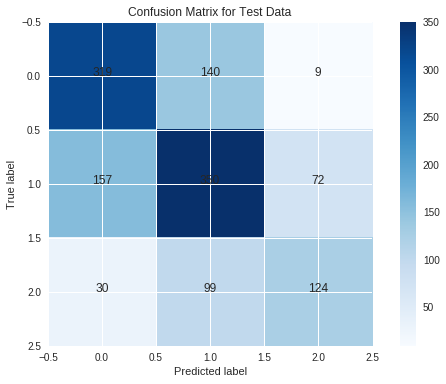

             precision    recall  f1-score   support

          0       0.63      0.68      0.66       468
          1       0.59      0.60      0.60       579
          2       0.60      0.49      0.54       253

avg / total       0.61      0.61      0.61      1300



In [0]:
#===================== Prédiction Dataset combined wine ======================
# Les 10 classes normales
knn_wine_combine_data = knn_model(wine_combine_data)
knn_wine_combine_data.knn_train()
knn_wine_combine_data.knn_predict()
knn_wine_combine_data.knn_print_accuracy_score()

# Classes splitées en 2 qualités et équilibrées
knn_wine_combine_data_2_kind_of_quality_equilibrees = knn_model(wine_combine_data_2_kind_of_quality_equilibrees)
knn_wine_combine_data_2_kind_of_quality_equilibrees.knn_train()
knn_wine_combine_data_2_kind_of_quality_equilibrees.knn_predict()
knn_wine_combine_data_2_kind_of_quality_equilibrees.knn_print_accuracy_score()
knn_wine_combine_data_2_kind_of_quality_equilibrees.compute_roc()

# Classes splitées en 3 qualités et équilibrées
knn_wine_combine_data_3_kind_of_quality_equilibrees = knn_model(wine_combine_data_3_kind_of_quality_equilibrees)
knn_wine_combine_data_3_kind_of_quality_equilibrees.knn_train()
knn_wine_combine_data_3_kind_of_quality_equilibrees.knn_predict()
knn_wine_combine_data_3_kind_of_quality_equilibrees.knn_print_accuracy_score()

# Classes splitées en 3 qualités et desequilibrées
knn_wine_combine_data_3_kind_of_quality_desequilibrees = knn_model(wine_combine_data_3_kind_of_quality_desequilibrees)
knn_wine_combine_data_3_kind_of_quality_desequilibrees.knn_train()
knn_wine_combine_data_3_kind_of_quality_desequilibrees.knn_predict()
knn_wine_combine_data_3_kind_of_quality_desequilibrees.knn_print_accuracy_score()

### White wine predictions


============= Summary of perf on White ==================

Accuracy score :  0.5428571428571428
list of unique_predicted_class  [3 4 5 6 7 8]


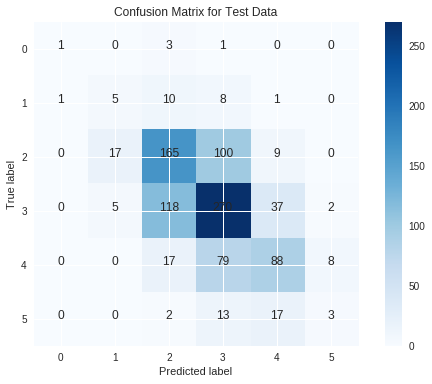

             precision    recall  f1-score   support

          3       0.50      0.20      0.29         5
          4       0.19      0.20      0.19        25
          5       0.52      0.57      0.54       291
          6       0.57      0.62      0.60       432
          7       0.58      0.46      0.51       192
          8       0.23      0.09      0.13        35

avg / total       0.54      0.54      0.54       980


============= Summary of perf on White_2_Quality_equilibre ==================

Accuracy score :  0.760670731707317
list of unique_predicted_class  [0 1]


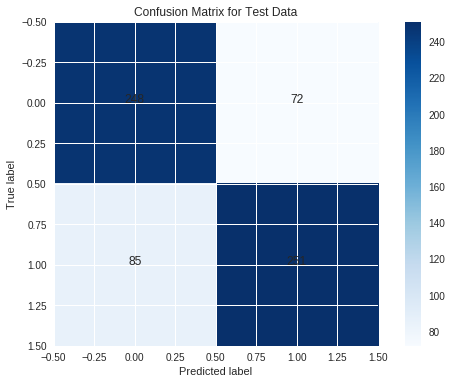

             precision    recall  f1-score   support

          0       0.74      0.78      0.76       320
          1       0.78      0.75      0.76       336

avg / total       0.76      0.76      0.76       656

roc : 0.7610119047619047

============= Summary of perf on White_3_Quality_equilibre ==================

Accuracy score :  0.5518867924528302
list of unique_predicted_class  [0 1 2]


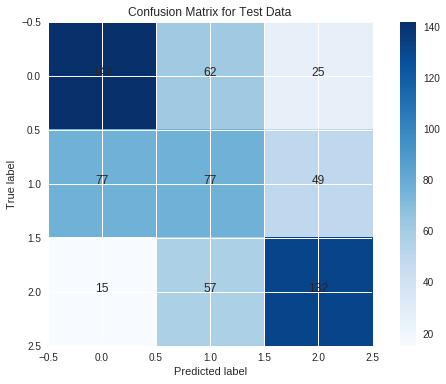

             precision    recall  f1-score   support

          0       0.61      0.62      0.61       229
          1       0.39      0.38      0.39       203
          2       0.64      0.65      0.64       204

avg / total       0.55      0.55      0.55       636


============= Summary of perf on White_3_Quality_desequilibre ==================

Accuracy score :  0.6
list of unique_predicted_class  [0 1 2]


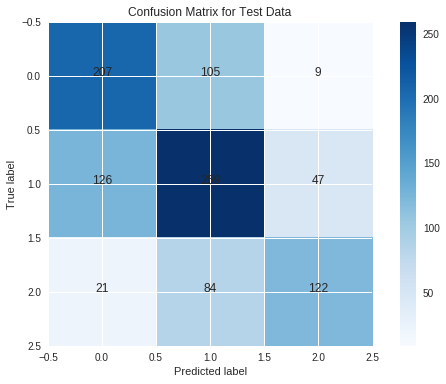

             precision    recall  f1-score   support

          0       0.58      0.64      0.61       321
          1       0.58      0.60      0.59       432
          2       0.69      0.54      0.60       227

avg / total       0.61      0.60      0.60       980



In [0]:
#===================== Prédiction Dataset white wine =========================
# Les 10 classes normales
knn_wine_white_data = knn_model(wine_white_data)
knn_wine_white_data.knn_train()
knn_wine_white_data.knn_predict()
knn_wine_white_data.knn_print_accuracy_score()

# Classes splitées en 2 qualités et équilibrées
knn_wine_white_data_2_kind_of_quality_equilibrees = knn_model(wine_white_data_2_kind_of_quality_equilibrees)
knn_wine_white_data_2_kind_of_quality_equilibrees.knn_train()
knn_wine_white_data_2_kind_of_quality_equilibrees.knn_predict()
knn_wine_white_data_2_kind_of_quality_equilibrees.knn_print_accuracy_score()
knn_wine_white_data_2_kind_of_quality_equilibrees.compute_roc()

# Classes splitées en 3 qualités et équilibrées
knn_wine_white_data_3_kind_of_quality_equilibrees = knn_model(wine_white_data_3_kind_of_quality_equilibrees)
knn_wine_white_data_3_kind_of_quality_equilibrees.knn_train()
knn_wine_white_data_3_kind_of_quality_equilibrees.knn_predict()
knn_wine_white_data_3_kind_of_quality_equilibrees.knn_print_accuracy_score()

# Classes splitées en 3 qualités et desequilibrées
knn_wine_white_data_3_kind_of_quality_desequilibrees = knn_model(wine_white_data_3_kind_of_quality_desequilibrees)
knn_wine_white_data_3_kind_of_quality_desequilibrees.knn_train()
knn_wine_white_data_3_kind_of_quality_desequilibrees.knn_predict()
knn_wine_white_data_3_kind_of_quality_desequilibrees.knn_print_accuracy_score()


### Red wine predictions


============= Summary of perf on Red ==================

Accuracy score :  0.546875
list of unique_predicted_class  [3 4 5 6 7]


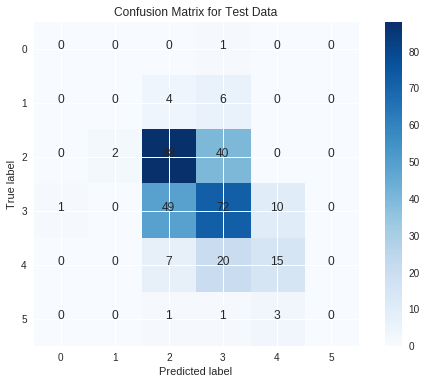

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        10
          5       0.59      0.68      0.63       130
          6       0.51      0.55      0.53       132
          7       0.54      0.36      0.43        42
          8       0.00      0.00      0.00         5

avg / total       0.52      0.55      0.53       320


============= Summary of perf on Red_2_Quality_equilibre ==================

Accuracy score :  0.7214765100671141
list of unique_predicted_class  [0 1]


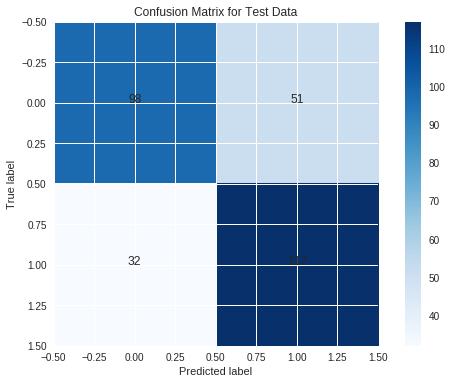

             precision    recall  f1-score   support

          0       0.75      0.66      0.70       149
          1       0.70      0.79      0.74       149

avg / total       0.73      0.72      0.72       298


============= Summary of perf on Red_3_Quality_equilibre ==================

Accuracy score :  0.4961832061068702
list of unique_predicted_class  [0 1 2]


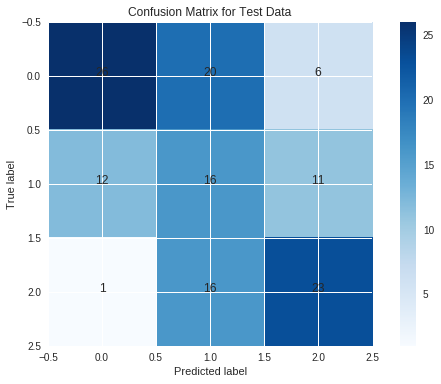

             precision    recall  f1-score   support

          0       0.67      0.50      0.57        52
          1       0.31      0.41      0.35        39
          2       0.57      0.57      0.57        40

avg / total       0.53      0.50      0.51       131


============= Summary of perf on Red_3_Quality_desequilibre ==================

Accuracy score :  0.584375
list of unique_predicted_class  [0 1 2]


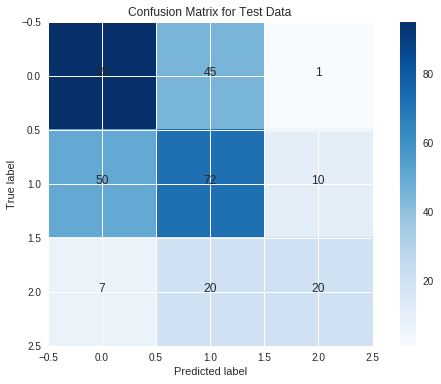

             precision    recall  f1-score   support

          0       0.62      0.67      0.65       141
          1       0.53      0.55      0.54       132
          2       0.65      0.43      0.51        47

avg / total       0.59      0.58      0.58       320



In [0]:
#===================== Prédiction Dataset red wine =========================
# Les 10 classes normales
knn_wine_red_data = knn_model(wine_red_data)
knn_wine_red_data.knn_train()
knn_wine_red_data.knn_predict()
knn_wine_red_data.knn_print_accuracy_score()

# Classes splitées en 2 qualités et équilibrées
knn_wine_red_data_2_kind_of_quality_equilibrees = knn_model(wine_red_data_2_kind_of_quality_equilibrees)
knn_wine_red_data_2_kind_of_quality_equilibrees.knn_train()
knn_wine_red_data_2_kind_of_quality_equilibrees.knn_predict()
knn_wine_red_data_2_kind_of_quality_equilibrees.knn_print_accuracy_score()

# Classes splitées en 3 qualités et équilibrées
knn_wine_red_data_3_kind_of_quality_equilibrees = knn_model(wine_red_data_3_kind_of_quality_equilibrees)
knn_wine_red_data_3_kind_of_quality_equilibrees.knn_train()
knn_wine_red_data_3_kind_of_quality_equilibrees.knn_predict()
knn_wine_red_data_3_kind_of_quality_equilibrees.knn_print_accuracy_score()

# Classes splitées en 3 qualités et desequilibrées
knn_wine_red_data_3_kind_of_quality_desequilibrees = knn_model(wine_red_data_3_kind_of_quality_desequilibrees)
knn_wine_red_data_3_kind_of_quality_desequilibrees.knn_train()
knn_wine_red_data_3_kind_of_quality_desequilibrees.knn_predict()
knn_wine_red_data_3_kind_of_quality_desequilibrees.knn_print_accuracy_score()

### VI.A.2) Recherche des meilleurs paramètres  pour le KNN sur le "White Wine"

In [0]:
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weights = ['uniform', 'distance']
p = [1, 2, 3, 4, 5]


In [0]:
knn_wine_white_data.search_by_gridSearch(neighbours, weights, p)
knn_wine_white_data.print_best_score_find_by_gridSearch()
knn_wine_white_data.print_score_of_generalisation_on_test_set()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Meilleur résultat de la validation croisée : 0.6549259826442062
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.682


In [0]:
knn_wine_white_data_2_kind_of_quality_equilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_white_data_2_kind_of_quality_equilibrees.print_best_score_find_by_gridSearch()
knn_wine_white_data_2_kind_of_quality_equilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.7999237804878049
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.799


In [0]:
knn_wine_white_data_3_kind_of_quality_equilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_white_data_3_kind_of_quality_equilibrees.print_best_score_find_by_gridSearch()
knn_wine_white_data_3_kind_of_quality_equilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.6572327044025157
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.621


In [0]:
knn_wine_white_data_3_kind_of_quality_desequilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_white_data_3_kind_of_quality_desequilibrees.print_best_score_find_by_gridSearch()
knn_wine_white_data_3_kind_of_quality_desequilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.6970393057682491
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

Resultat sur le jeu de test : 0.699


### VI.B.2) Recherche des meilleurs paramètres  pour le knn sur le "Red Wine"

In [0]:
knn_wine_red_data.search_by_gridSearch(neighbours, weights, p)
knn_wine_red_data.print_best_score_find_by_gridSearch()
knn_wine_red_data.print_score_of_generalisation_on_test_set()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Meilleur résultat de la validation croisée : 0.6825645035183737
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 3, 'weights': 'distance'}

Resultat sur le jeu de test : 0.656


In [0]:
knn_wine_red_data_2_kind_of_quality_equilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_red_data_2_kind_of_quality_equilibrees.print_best_score_find_by_gridSearch()
knn_wine_red_data_2_kind_of_quality_equilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.788235294117647
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.772


In [0]:
knn_wine_red_data_3_kind_of_quality_equilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_red_data_3_kind_of_quality_equilibrees.print_best_score_find_by_gridSearch()
knn_wine_red_data_3_kind_of_quality_equilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.6480769230769231
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

Resultat sur le jeu de test : 0.588


In [0]:
knn_wine_red_data_3_kind_of_quality_desequilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_red_data_3_kind_of_quality_desequilibrees.print_best_score_find_by_gridSearch()
knn_wine_red_data_3_kind_of_quality_desequilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.7122752150117279
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 5, 'weights': 'distance'}

Resultat sur le jeu de test : 0.647


### VI.C.2) Recherche des meilleurs paramètres  pour le knn sur la combinaison de "White-Red Wine"

In [0]:
knn_wine_combine_data.search_by_gridSearch(neighbours, weights, p)
knn_wine_combine_data.print_best_score_find_by_gridSearch()
knn_wine_combine_data.print_score_of_generalisation_on_test_set()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Meilleur résultat de la validation croisée : 0.6563401962670772
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 3, 'weights': 'distance'}

Resultat sur le jeu de test : 0.675


In [0]:
knn_wine_combine_data_2_kind_of_quality_equilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_combine_data_2_kind_of_quality_equilibrees.print_best_score_find_by_gridSearch()
knn_wine_combine_data_2_kind_of_quality_equilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.7928683796539067
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.780


In [0]:
knn_wine_combine_data_3_kind_of_quality_equilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_combine_data_3_kind_of_quality_equilibrees.print_best_score_find_by_gridSearch()
knn_wine_combine_data_3_kind_of_quality_equilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.6491514360313316
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.675


In [0]:
knn_wine_combine_data_3_kind_of_quality_desequilibrees.search_by_gridSearch(neighbours, weights, p)
knn_wine_combine_data_3_kind_of_quality_desequilibrees.print_best_score_find_by_gridSearch()
knn_wine_combine_data_3_kind_of_quality_desequilibrees.print_score_of_generalisation_on_test_set()

Meilleur résultat de la validation croisée : 0.6934770059649797
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Resultat sur le jeu de test : 0.714
